<a href="https://colab.research.google.com/github/SkymanOne/COMP3217_CW2/blob/main/COMP3217_CW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP3217 ML for Security Coursework

Inspired by [the lab](https://colab.research.google.com/github/jomar0/comp3217lab2/blob/main/comp3217_lab2.ipynb).

## PART A

Binary classification of logs.




### Prelude

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn import neighbors, svm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, mean_squared_error, r2_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv('/content/data/TrainingDataBinary.csv')
test_data = pd.read_csv('/content/data/TestingDataBinary.csv')

# Split features and labels
features = train_data.iloc[:, :-1]
labels = train_data.iloc[:, -1]

# Split the data into training and testing sets
f_train, f_test, l_train, l_test = train_test_split(features, labels, test_size=0.2, random_state=42)

### Logistic regression

No optimisations

Accuracy: 0.9016666666666666 (90.17%)
F1 score: 0.9015219586559138 (90.15%)


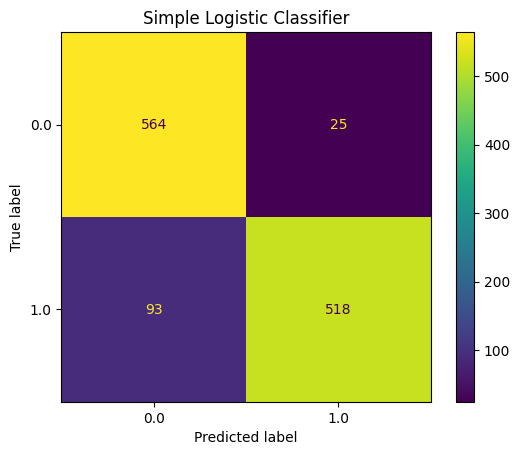

In [ ]:
# Logistic Regression Classifier
logreg = LogisticRegression(max_iter=10000)
model = logreg.fit(f_train, l_train)


score = model.score(f_test, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Simple Logistic Classifier')
plt.show()

### Logistic Regression (Optimised)

- Hyperparameters tuning
- Feature normalisations

Best C value: 100
Accuracy: 0.93 (93.00%)
F1 score: 0.9299968887506112 (93.00%)


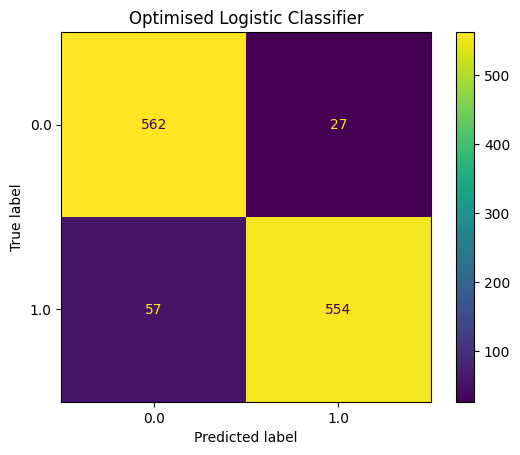

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
f_train_scaled = scaler.fit_transform(f_train)

# Transform the test data with the same scaler
f_test_scaled = scaler.transform(f_test)

# Initialize PCA
pca = PCA()

# Fit and transform the scaled training data
f_train_pca = pca.fit_transform(f_train_scaled)

# Transform the scaled test data
f_test_pca = pca.transform(f_test_scaled)


# Logistic Regression Classifier
logreg = LogisticRegression(max_iter=10000)

# Define a range of `C` values to try
parameters = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Setup the grid search
clf = GridSearchCV(logreg, parameters, cv=5)
clf.fit(f_train_pca, l_train)

# Best `C` value
print("Best C value:", clf.best_params_['C'])

C = clf.best_params_['C']

# Optimised Logistic Regression Classifier
logreg = LogisticRegression(max_iter=10000, C=C)

model = logreg.fit(f_train_pca, l_train)


score = model.score(f_test_pca, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test_pca)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Optimised Logistic Classifier')
plt.show()

### Adding PCA Prelude

Using PCA improves the results, therefore we inject it into the pipeline

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
f_train_scaled = scaler.fit_transform(f_train)

# Transform the test sample data with the same scaler
f_test_scaled = scaler.transform(f_test)

# Transform the test data with the same scaler
f_predict_scaled = scaler.transform(test_data)

# Initialize PCA
pca = PCA()

# Fit and transform the scaled training data
f_train_pca = pca.fit_transform(f_train_scaled)

# Transform the scaled test sample data
f_test_pca = pca.transform(f_test_scaled)

# Transform the scaled test data
f_predict_pca = pca.transform(f_predict_scaled)



### Decision Tree Classifier

Accuracy: 0.96 (96.00%)
F1 score: 0.959986551035209 (96.00%)


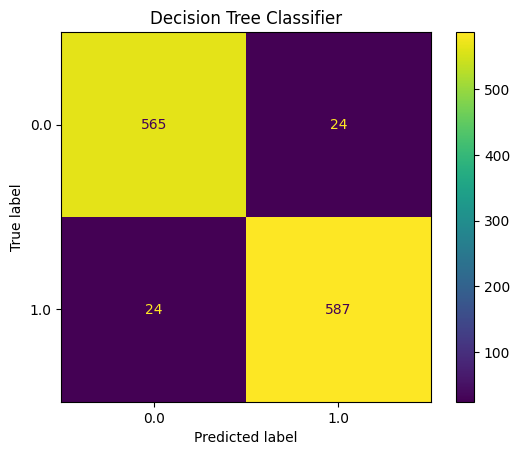

In [ ]:
tree = DecisionTreeClassifier()
model = tree.fit(f_train, l_train)


score = model.score(f_test, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Decision Tree Classifier')
plt.show()

### Support Vector Machine Classifier



Accuracy: 0.49833333333333335 (49.83%)
F1 score: 0.34541500543675246 (34.54%)


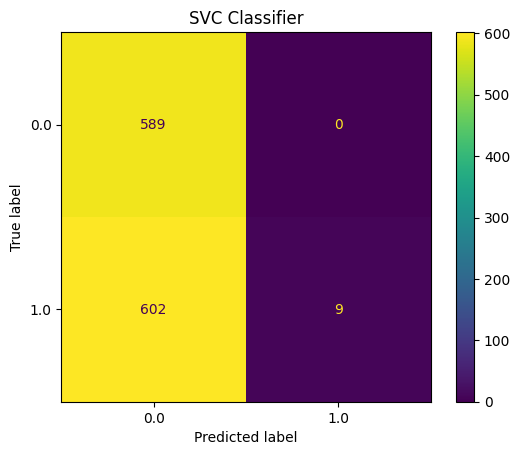

In [ ]:
svc = svm.SVC()
model = svc.fit(f_train, l_train)


score = model.score(f_test, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('SVC Classifier')
plt.show()

### Random Forest Classifier

Accuracy: 0.9891666666666666 (98.92%)
F1 score: 0.9891603360017898 (98.92%)


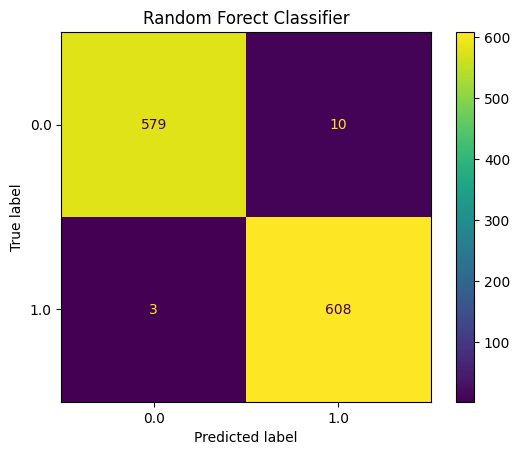

In [ ]:
forest = RandomForestClassifier()
model = forest.fit(f_train, l_train)


score = model.score(f_test, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Random Forect Classifier')
plt.show()

Trying scaled data

Accuracy: 0.9583333333333334 (95.83%)
F1 score: 0.958307275380446 (95.83%)


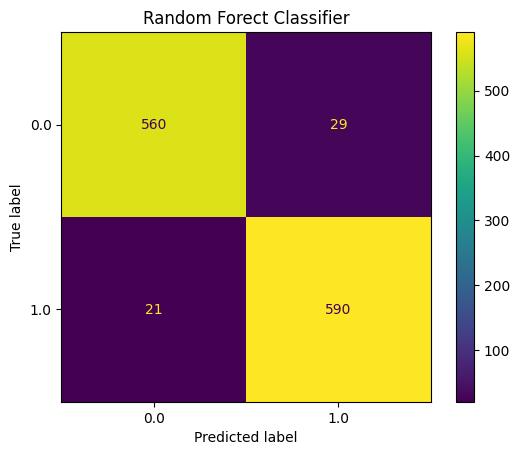

In [ ]:
forest = RandomForestClassifier()
model = forest.fit(f_train_pca, l_train)


score = model.score(f_test_pca, l_test)
print(f"Accuracy: {score} ({score*100:.2f}%)")
predictions = model.predict(f_test_pca)
f1 = f1_score(l_test, predictions, average='macro')
print(f"F1 score: {f1} ({f1*100:.2f}%)")
# use predicted labels to visualise confusion matrix
cm = confusion_matrix(l_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Random Forect Classifier')
plt.show()

### Writing data using Random Forest

In [47]:
forest = RandomForestClassifier()
model = forest.fit(f_train, l_train)

predictions = model.predict(test_data)

# Write data to column
test_copy = test_data.copy()
test_copy['Output'] = predictions

# Print the output
print(predictions)

# Output the result
test_copy.to_csv('TestingResultsBinary.csv', index=False, header=False)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part B

Multiclass classification of logs